# SNSPD Example

This example will create an snspd chip using `gdsfactory` package

In [1]:
import pytools_litho_design as pld
import numpy as np
import matplotlib.pyplot as plt
import gdsfactory as gf
from gdsfactory.typings import Layer
%matplotlib inline

# Layer definitions

Layers in `gdsfactory` are defined as a tuple of 2 integers (gdslayer, gds_purpose). The layers can be extracted from the `lyp` (layout properties) file from klayout or you can create them from scratch using a class (as we do here).

In [2]:
class LAYER(gf.technology.layer_map.LayerMap):
    WAFER: Layer = (999, 0)

    NBTIN: Layer = (1, 0)
    ASIO: Layer = (2, 0)

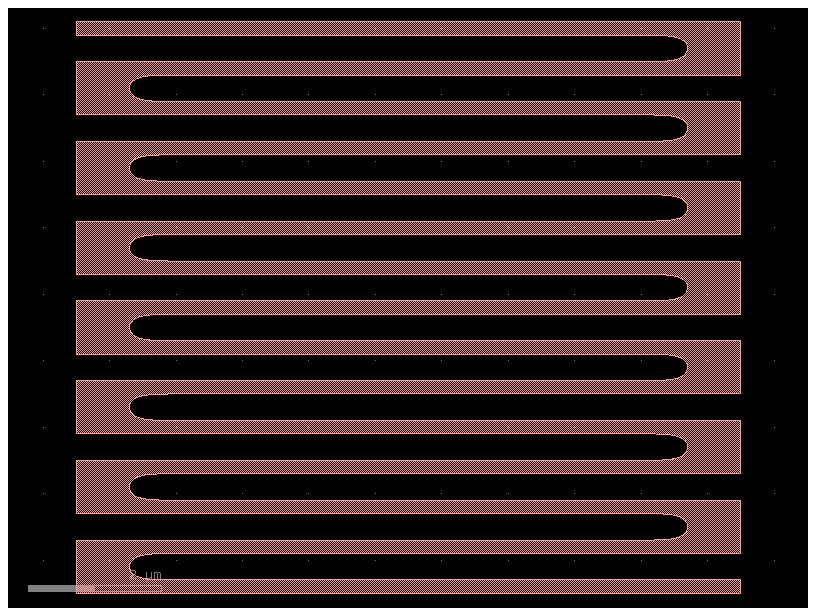

In [3]:
# Create the snspd object
SNSPD = gf.components.superconductors.snspd(layer=LAYER.NBTIN)
SNSPD.plot()
plt.show()

In [5]:
# Add the components to the chip
CHIP = gf.Component()
snspd = CHIP << SNSPD
for port in snspd.ports:
    CHIP.add_port(name=port.name, port=port)



# Add the pads to the chip
cross_section = gf.cross_section.cross_section(layer=LAYER.NBTIN)
gf.routing.add_pads_top(component=CHIP, port_names=["e1", "e2"], cross_section=cross_section)
CHIP.plot()
plt.show()

ValueError: Taper component should have two ports of port_type='electrical'! Got ["Port(self.name='o1', self.width=200, trans=r180 *1 0,0, layer=NBTIN (1/0), port_type=optical)", "Port(self.name='o2', self.width=500, trans=r0 *1 10,0, layer=NBTIN (1/0), port_type=optical)"].